<a href="https://colab.research.google.com/github/Akul-Patel/DataMining/blob/main/BTC_FORCASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BTC Deep Forecasting

Authors:

**Akulkumar Patel**,
**Rami Elzibawi**,
and 
**Ron Nathaniel**

#DATA (10 POINTS)

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [ ]:
btc_df = yf.download(tickers='BTC-USD',
                      start='2014-1-01',
                      end='2021-11-29',
                      interval="1d",
)
btc_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,57274.679688,34284016248
2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,53569.765625,41810748221
2021-11-27,53736.429688,55329.257812,53668.355469,54815.078125,54815.078125,30560857714


There are 2599 observations in the training data
There are 29 observations in the test data


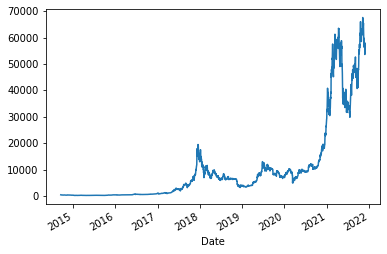

In [ ]:
all_data = btc_df[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)
all_data

print("There are "+ str(all_data[:'2021-11-01'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2021-11-01':].shape[0]) + " observations in the test data")
all_data['Adj Close'].plot()


#Tweet Sentiment Analysis (30 Points)

In [ ]:
#!pip uninstall twint
#!pip install aiohttp
#!pip install twint
#!pip3 install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
import twint
import nest_asyncio
nest_asyncio.apply()
c = twint.Config()
c.Search = 'bitcoin'
c.Limit = 1000
c.Lang = "en"
c.Until = '2021-03-10'
c.Hide_output = True
c.Pandas = True
twint.run.Search(c)
df = twint.storage.panda.Tweets_df #result is saved to df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [ ]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
#extract year,month,day into new columns from datetime column
df['year']=pd.to_datetime(df['date']).dt.strftime('%Y')
df['month']=pd.to_datetime(df['date']).dt.strftime('%m')
df['day']=pd.to_datetime(df['date']).dt.strftime('%A')

In [ ]:
import re
def preprocess_tweets(tweet):
    stop_words = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
    translation={39:None}
    processed_tweet = tweet
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(stop_words).translate(translation))
    return(processed_tweet)
df['Processed Tweet'] = df['tweet'].apply(lambda x: preprocess_tweets(x.lower()))

In [ ]:
#here we are making a new column 'polarity' by applying textblob function on the processed tweets which are in english language
from textblob import TextBlob
df['polarity'] = df[df['language']=='en']['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))

In [ ]:
df[['date','username','tweet','language','sentiment']]
df.groupby('username')
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,year,month,Processed Tweet,polarity,sentiment
0,1369437844792610816,1369384367861153796,1.615334e+12,2021-03-09 23:59:59,+0000,,@OTC_Bitcoin Best crypto news of 2021! I’m str...,en,[],[],1293725353546940416,1293725353546940416,Risingcryptoj,Chrane531,Tuesday,23,https://twitter.com/Risingcryptoj/status/13694...,[],[],0,,False,0,0,0,,bitcoin,,,,,,,"[{'screen_name': 'OTC_Bitcoin', 'name': '$true...",,,,,2021,03,bitcoin best crypto news 2021 strapped let go ...,1.000000,positive
1,1369437841336508416,1369437841336508416,1.615334e+12,2021-03-09 23:59:58,+0000,,"📈🪙$590,377 $BTC #LONGED @$54,950 [09/03/21 23:...",en,[longed],"[btc, btcusd]",968796006576947200,968796006576947200,WhaleTrades,WhaleTrades.eth 🐳,Tuesday,23,https://twitter.com/WhaleTrades/status/1369437...,[],[],0,,False,1,0,0,,bitcoin,,,,,,,[],,,,,2021,03,590 377 btc longed 54 950 09 03 21 23 59 58 bi...,0.000000,neutral
2,1369437820289486857,1369395736979312657,1.615334e+12,2021-03-09 23:59:53,+0000,,@chilltechbruh @JasonYanowitz I have about 35%...,en,[],[],614269277,614269277,adamgamz1,adamgamz,Tuesday,23,https://twitter.com/adamgamz1/status/136943782...,[],[],0,,False,9,4,0,,bitcoin,,,,,,,"[{'screen_name': 'chilltechbruh', 'name': 'KC'...",,,,,2021,03,35 eth 15 ltc 50 btc hold bitcoin celsius over...,0.000000,neutral
3,1369437818083229698,1369437818083229698,1.615334e+12,2021-03-09 23:59:53,+0000,,US Retail Investors More Bullish on Cardano Th...,en,[],[],48935222,48935222,Georg_Grey,Georg Grey,Tuesday,23,https://twitter.com/Georg_Grey/status/13694378...,[https://decrypt.co/60774/us-retail-investors-...,[],0,,False,0,0,1,,bitcoin,,,,,,,[],,,,,2021,03,retail investors bullish cardano bitcoin surve...,0.000000,neutral
4,1369437788123369472,1369437788123369472,1.615334e+12,2021-03-09 23:59:46,+0000,,"I want to buy or build a computer for gaming, ...",en,[],[],1355311546759606274,1355311546759606274,UrsTruly_Vixen,Self_Proclaimed,Tuesday,23,https://twitter.com/UrsTruly_Vixen/status/1369...,[],[],0,,False,0,0,0,,bitcoin,,,,,,,[],,,,,2021,03,want buy build computer gaming video editing m...,-0.291667,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1369437408358522884,1369305729778192389,1.615334e+12,2021-03-09 23:58:15,+0000,,@bluemattison @ScorchingLizard Do you realize ...,en,[],[],2838007354,2838007354,puddingt4rt,Pudding,Tuesday,23,https://twitter.com/puddingt4rt/status/1369437...,[],[],0,,False,0,1,0,,bitcoin,,,,,,,"[{'screen_name': 'bluemattison', 'name': 'matt...",,,,,2021,03,realize make three tweets explaining simpler s...,0.000000,neutral
74,1369437407620304896,1369437407620304896,1.615334e+12,2021-03-09 23:58:15,+0000,,No need to spend your own money to trade #cryp...,en,"[cryptocurrency, bitcoin, eth, citi, aon, lato...",[],843495447977254913,843495447977254913,eaglechina1,NNANTA OLUCHI,Tuesday,23,https://twitter.com/eaglechina1/status/1369437...,[https://t.me/latoken_airdrops_bot?start=7upya...,[],0,,False,0,1,0,,bitcoin,,,,,,,[],,,,,2021,03,need spend money trade cryptocurrency over 10k...,0.333333,positive
75,1369437406752108544,1369437406752108544,1.615334e+12,2021-03-09 23:58:15,+0000,,Bitmain Antminer V9 4TH ASIC Miner Bitcoin WIT...,en,"[bitcoin, crypto, antminer, bitmain]",[],393697898,393697898,bmine3rz,Blockmine3rz,Tuesday,23,https://twitter.com/bmine3rz/status/1369437406...,[https://blockmine3rz.com/2021/03/09/bitmain-a...,[],0,,False,0,0,0,,bitcoin,,,,,,,[],,,,,2021,03,bitmain antminer v9 4th asic miner bitcoin psu...,0.000000,neutral
76,1369437404462002178,1369437404462002178,1.615334e+12,2021-03-09 23:58:14

In [ ]:
df.drop(df.columns.difference(['id','date','Processed Tweet']), 1, inplace=True)
df.rename(columns={'date': 'Date', 'Processed Tweet': 'Tweets'})
# X=0
# for i in range (0,len(btc_df)):
#   print(str(btc_df.index[X]).split()[0])
#   X += 1
#   # print(X)

# data = yf.download(tickers='BTC-USD',
#                       start='2021-12-11',
#                       end='2021-12-11',
#                    auto_adjust=True)['Close']
# print(str(data).split()[2])
pd.options.mode.chained_assignment = None  # default='warn'
df['Prices']=""
for i in range (0,len(df)):
  get_tweet_date = df.date.iloc[i].split()[0]
  get_stock_price = yf.download(tickers='BTC-USD',
              start=get_tweet_date,
              end=get_tweet_date)['Close']
  get_stock_price= int(float(str(get_stock_price).split()[2]))
  df['Prices'].iloc[i] = get_stock_price
  # print(get_tweet_date, get_stock_price)
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,id,date,Processed Tweet,Prices
0,1369437844792610816,2021-03-09 23:59:59,bitcoin best crypto news 2021 strapped let go ...,54824
1,1369437841336508416,2021-03-09 23:59:58,590 377 btc longed 54 950 09 03 21 23 59 58 bi...,54824
2,1369437820289486857,2021-03-09 23:59:53,35 eth 15 ltc 50 btc hold bitcoin celsius over...,54824
3,1369437818083229698,2021-03-09 23:59:53,retail investors bullish cardano bitcoin surve...,54824
4,1369437788123369472,2021-03-09 23:59:46,want buy build computer gaming video editing m...,54824


In [ ]:
#drop rows that do not have Price values
df['Prices'].replace('', np.nan, inplace=True)
df.dropna(subset=['Prices'], inplace=True)
df.reset_index(drop=True, inplace=True)
df['Prices'] = df['Prices'].apply(np.int64)
df

,id,date,Processed Tweet,Prices
0,1369437844792610816,2021-03-09 23:59:59,bitcoin best crypto news 2021 strapped let go ...,54824
1,1369437841336508416,2021-03-09 23:59:58,590 377 btc longed 54 950 09 03 21 23 59 58 bi...,54824
2,1369437820289486857,2021-03-09 23:59:53,35 eth 15 ltc 50 btc hold bitcoin celsius over...,54824
3,1369437818083229698,2021-03-09 23:59:53,retail investors bullish cardano bitcoin surve...,54824
4,1369437788123369472,2021-03-09 23:59:46,want buy build computer gaming video editing m...,54824
...,...,...,...,...
73,1369437408358522884,2021-03-09 23:58:15,realize make three tweets explaining simpler s...,54824
74,1369437407620304896,2021-03-09 23:58:15,need spend money trade cryptocurrency over 10k...,54824
75,1369437406752108544,2021-03-09 23:58:15,bitmain antminer v9 4th asic miner bitcoin psu...,54824
76,1369437404462002178,2021-03-09 23:58:14,bitmain antminer s9 bitcoin miner 1400w platin...,54824


In [ ]:
df = df.rename(columns={'date': 'Date', 'Processed Tweet': 'Tweets'})
df["Comp"] = ''
df["Negative"] = ''
df["Neutral"] = ''
df["Positive"] = ''
df

,id,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,1369437844792610816,2021-03-09 23:59:59,bitcoin best crypto news 2021 strapped let go ...,54824,,,,
1,1369437841336508416,2021-03-09 23:59:58,590 377 btc longed 54 950 09 03 21 23 59 58 bi...,54824,,,,
2,1369437820289486857,2021-03-09 23:59:53,35 eth 15 ltc 50 btc hold bitcoin celsius over...,54824,,,,
3,1369437818083229698,2021-03-09 23:59:53,retail investors bullish cardano bitcoin surve...,54824,,,,
4,1369437788123369472,2021-03-09 23:59:46,want buy build computer gaming video editing m...,54824,,,,
...,...,...,...,...,...,...,...,...
73,1369437408358522884,2021-03-09 23:58:15,realize make three tweets explaining simpler s...,54824,,,,
74,1369437407620304896,2021-03-09 23:58:15,need spend money trade cryptocurrency over 10k...,54824,,,,
75,1369437406752108544,2021-03-09 23:58:15,bitmain antminer v9 4th asic miner bitcoin psu...,54824,,,,
76,1369437404462002178,2021-03-09 23:58:14,bitmain antminer s9 bitcoin miner 1400w platin...,54824,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        df['Comp'].iloc[indexx] = sentence_sentiment['compound']
        df['Negative'].iloc[indexx] = sentence_sentiment['neg']
        df['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        df['Positive'].iloc[indexx] = sentence_sentiment['compound']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)
df

,id,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,1369437844792610816,2021-03-09 23:59:59,bitcoin best crypto news 2021 strapped let go ...,54824,0.8979,0,0.524,0.8979
1,1369437841336508416,2021-03-09 23:59:58,590 377 btc longed 54 950 09 03 21 23 59 58 bi...,54824,0,0,1,0
2,1369437820289486857,2021-03-09 23:59:53,35 eth 15 ltc 50 btc hold bitcoin celsius over...,54824,0,0,1,0
3,1369437818083229698,2021-03-09 23:59:53,retail investors bullish cardano bitcoin surve...,54824,0,0,1,0
4,1369437788123369472,2021-03-09 23:59:46,want buy build computer gaming video editing m...,54824,-0.101,0.089,0.842,-0.101
...,...,...,...,...,...,...,...,...
73,1369437408358522884,2021-03-09 23:58:15,realize make three tweets explaining simpler s...,54824,0,0,1,0
74,1369437407620304896,2021-03-09 23:58:15,need spend money trade cryptocurrency over 10k...,54824,0.8934,0,0.672,0.8934
75,1369437406752108544,2021-03-09 23:58:15,bitmain antminer v9 4th asic miner bitcoin psu...,54824,0,0,1,0
76,1369437404462002178,2021-03-09 23:58:14,bitmain antminer s9 bitcoin miner 1400w platin...,54824,0,0,1,0


% of positive tweets=  39.743589743589745
% of negative tweets=  10.256410256410255


[]

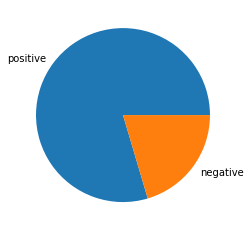

In [ ]:
posi=0
nega=0
for i in range (0,len(df)):
    get_val=df.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(df)))*100
negper=(nega/(len(df)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

#Deep AR (15 Points)

In [ ]:
#Function to normalize the data, we are just adjusting the values but putting them on a different scale. Resulting in higher quality data
def ts_train_test_normalize(all_data,time_steps,for_periods):

    # create training and test set
    ts_train = all_data[:'2021-11-01'].iloc[:,0:1].values
    ts_test  = all_data['2021-11-01':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1)) #scale data from a range of 0-1
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)

In [ ]:
# Convert the 3-D shape of X_train to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

# Convert the 3-D shape of X_test to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 2593 samples in the training data
There are 27 samples in the test data


In [ ]:
#Explained in documentation more thourughly 
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout
    
    
    # The LSTM architecture
    my_LSTM_model = Sequential() #Sequential API allows us to create our models layer by layer 
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dropout(0.2))
    my_LSTM_model.add(Dense(units=2))
    my_LSTM_model.summary()

    # Compiling
    my_LSTM_model.compile(optimizer='adam',loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_15 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_16 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 71,102
Trainable params: 71,102
Non-trai

array([[59440.684, 58734.832],
       [59856.27 , 59131.516],
       [59704.855, 58987.25 ],
       [59693.14 , 58977.457],
       [59958.367, 59231.715],
       [60434.15 , 59684.46 ],
       [60017.344, 59285.21 ],
       [59679.934, 58964.58 ],
       [60162.49 , 59430.133]], dtype=float32)

(9419241.0, <matplotlib.axes._subplots.AxesSubplot at 0x7fc6e99e8910>)

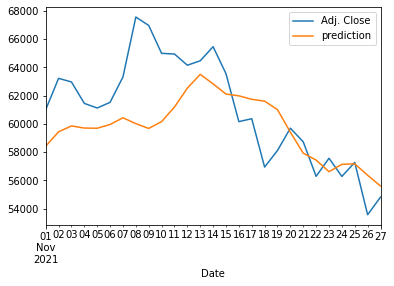

In [ ]:
def actual_pred_plot(preds):

    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2021-11-01':,'Adj Close'][0:len(preds)]   #We start at 2019 because that is where our test data begins 
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
  
actual_pred_plot(LSTM_prediction)  #We were asked to plot between the month of november and december so that is why we only plot for one month

Here we have a graph where the test and train data are split a little mor evenly, The graph above is the one asked for in the assignment and the one below just has more test data.

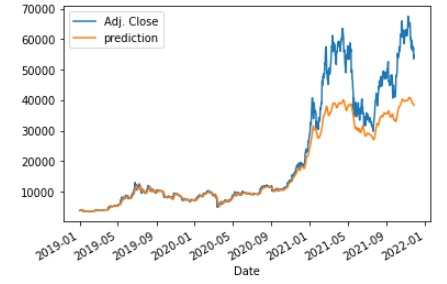

#Facebook Prophet (15 Points)

In [ ]:
from fbprophet import Prophet

start_date = "2021-09-10"
end_date = "2021-10-31"

play = YahooFinancials('BTC-USD')
hist=play.get_historical_price_data(start_date, end_date, "daily")
btc_df_fbprophet = pd.DataFrame(hist['BTC-USD']['prices'])


btc_df_fbprophet.drop(['date','low','open','close','volume','adjclose'], axis=1, inplace=True)
btc_df_fbprophet.columns = ['y', 'ds']
btc_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(btc_df_fbprophet)
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-10,2791.242726,45262.941633,51098.271811,2791.242726,2791.242726,45387.107163,45387.107163,45387.107163,44661.471282,44661.471282,44661.471282,725.635880,725.635880,725.635880,0.0,0.0,0.0,48178.349888
1,2021-09-11,2644.119037,44036.275694,49713.416540,2644.119037,2644.119037,44337.085505,44337.085505,44337.085505,44661.471282,44661.471282,44661.471282,-324.385778,-324.385778,-324.385778,0.0,0.0,0.0,46981.204542
2,2021-09-12,2496.995349,43813.571521,49481.192602,2496.995349,2496.995349,44307.372124,44307.372124,44307.372124,44661.471282,44661.471282,44661.471282,-354.099158,-354.099158,-354.099158,0.0,0.0,0.0,46804.367473
3,2021-09-13,2349.871661,44157.391007,50061.752841,2349.871661,2349.871661,44697.406862,44697.406862,44697.406862,44661.471282,44661.471282,44661.471282,35.935579,35.935579,35.935579,0.0,0.0,0.0,47047.278522
4,2021-09-14,2202.747972,43414.935561,49387.134899,2202.747972,2202.747972,44289.474381,44289.474381,44289.474381,44661.471282,44661.471282,44661.471282,-371.996902,-371.996902,-371.996902,0.0,0.0,0.0,46492.222353


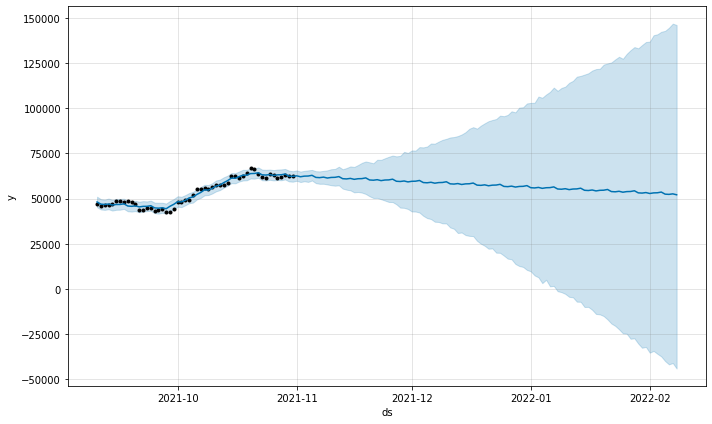

In [ ]:
plot1 = m.plot(forecast)

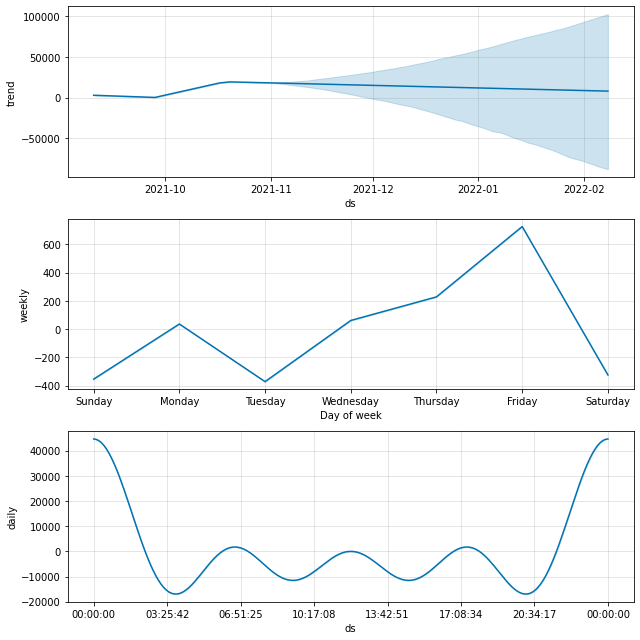

In [ ]:
plt2 = m.plot_components(forecast)

#Summary of Predictors



# Sentiment Analysis of Twitter Data for predicting movement in stock price of BTC

This project involves evaluating Bitcoin-related Twitter data and using sentiment analysis to predict its future stock movement. To determine the impact of "public sentiment" on "market trends," we used sentiment analysis and machine learning concepts. 

Data collection and parsing: yfinance API is used to collect stock market data, while Twint is used to retrieve tweets from Twitter. In this stage, the tweets are preprocessed by deleting stop words, and doing other tasks.

Sentiment Analysis: VADER is used to analyze the sentiment of the tweet. Each tweet is assigned an emotion score that indicates whether it is positive, negative, or neutral.

Processing: Rows with missing values, such as price values, are processed further. 

If we were able to extract data from the twitter from variety of days we would have done following things:

1. The data should have been separated into train and test data, along with sentiment scores, and given to the model.

2. Applying Regression Models: In this project, we could have utilized Random Forest and Support Vector Regression models to forecast stock market values. The RMSE scores will then be used to assess the efficiency of both the models and to determine which model is best for the dataset.



#LSTM Model Explained

The problem we are currently working with is a sequential problem so it's perfect in order to help us describe RNN’s. It is safe to say that stock values from previous days would have a heavy role in trying to predict the prices for that certain stock in our scenario bitcoin. In CNN’s all cases are considered independent so it wouldn't make sense to use because it's not possible for it to take into consideration previous stock prices and their correlation.

This is why we use a Recurrent neural network because it allows for dependency through time. 
Below we have an image of an unfolded RNN.



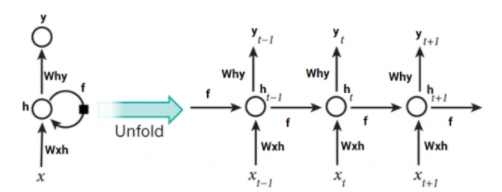

As you can see in the figure above we can see that every prediction at time h(t) is dependent on the previous. h(t) grabs from h(t-1) , then h(t+1) grabs h(t) meaning it holds everything that came before it. Unfortunately simple RNN’s only work well in short sequences, they fail to capture context. With RNN's, something that was said long  ago cannot be recalled when making present predictions, with RNN’s the information is entirely modified there is no check for important information vs unimportant information. This is where the importance of LSTM comes in because with LSTM we can selectively remember or forget things like we were just talking about, forget the useless information and remember the information you believe will be important in your predictions.

Now we will talk about the structure of LSTM and how they work before we describe the one that we had used for our Deep AR forecasting. A LSTM network is made up of different memory blocks called cells. There are two states that are transferred to the next cell, these states are known as the hidden state and the cell state. The job of these memory blocks is to remember the manipulations to memory , these manipulations are done through three major steps that we call gates which we will further discuss in detail. Below we have a figure for helping to understand the total overview of an LSTM architecture. 


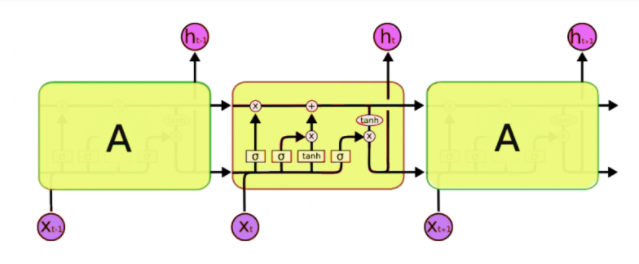

**Forget Gate**

As we talked about before , we want to get rid of or forget all the info that isn't pertinent to us , our forget gate is responsible for removing their information from the cell state. This information that is no longer required by our model is removed via the multiplication of a filter, which is required for optimizing performance. This forget gate takes 2 inputs: our h(t-1) which is our hidden state or our output from our previous cell and x_t which is the input at that time step. These inputs are both multiplied by our weight matrices and bias is added, then the sigmoid function outputs a vector with binary output either 1 or 0. If our output is 0 that means that the forget gate wants the cell state to forget that piece of information, and when the output is 1 it means the opposite we want the cell gate to remember that piece of information. Below we have a figure for the forget gate.


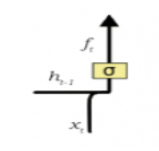

**Input Gate**

Now that we have seen how the model decides what to forget and what not to forget, we will now see how the model adds new information. The input gate is responsible for the addition of information to the cell state, this is a 3 step process. First we regulate values that need to be added using the same method we used in the forget gate with the sigmoid function. Next we create a vector with all the possible values to be added, we do this by using the tanh function. Then we multiply the value we just got with the value we had gotten from the first step and then send this out as output.


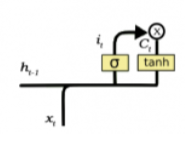

**Output Gate**

This is our third and final gate, the job of this gate is to select the current useful information from the current cell state and show it as output. We can split this gate into three steps like we did in the previous gate. First step is to use the tanh function to scale values from a range of -1 to 1, then making that same filter we have been making with the sigmoid function. Then finally multiply the vector in step 1 with the filter from step 2 and send this as output.


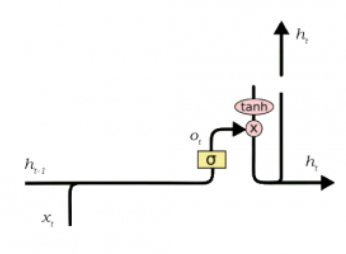

**Our Specific model**

Model has 4 LSTM layers

The activation function we will be using is tanh.

After our 4 LSTM layers we have our dropout layer which , randomly sets input 
units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting

Our final layer is our dense layer, which is a neural network layer. It performs our matrix-vector multiplication

**Model Summary**


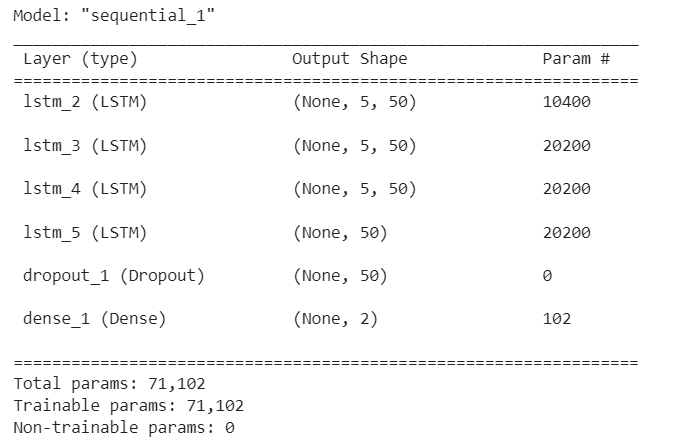

After creating our model, we compile it using the efficient ADAM optimization algorithm and the mean squared error loss function.

Finally we fit our model using a batch size of 150, and 50 epochs and train the model.


# **Facebook Prophet**

Trend, Seasonality, and Holidays are the three key components that Facebook's Prophet employs to create predictions. 



The general formula for it is as follows:

$$y(t) = g(t) + s(t) + h(t) + e(t)$$

where,

$g(t)$ represents the trend,

$s(t)$ represents the seasonality,

$h(t)$ represents the holidays, 

and 

$e(t)$ represents other noise that is not covered in the other three functions. 

------------

$g(t)$ is most commonly the **logistic function**, which takes the general shape:
$$g(t) = \frac{C}{1 + -k^{t-m}} $$

where, 
C is the **Carrying Capacity**, K is the **Growth Rate**, and m is the **offset**.

------------

Changepoints are used to show when the rate of growth could change. The majority of these are scheduled around notable occasions, such as holidays.

For seasonality, Prophet use a regular Fourier Series. The variable $s(t)$ allows the model to evolve over time. A model may, for example, create impacts every 5 days that is standard work week.

$h(t)$ denotes certain holidays that must be taken into account, such as Thanks Giving Holiday, a major shopping day. $h(t)$ employs a regressor matrix and a prior for each regressor.



Reference:
Taylor​​, S. J., &amp; Letham​, B. (2017, September 27). Forecasting at scale. PeerJ Preprints. Retrieved December 01, 2021, from https://doi.org/10.7287/peerj.preprints.3190v2.

# Results

Prediction Prices vs Actual Prices


(9419241.0, <matplotlib.axes._subplots.AxesSubplot at 0x7fc6f6e86850>)

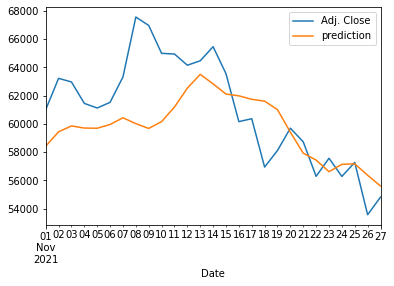

In [ ]:
actual_pred_plot(LSTM_prediction)